## Simulation of Hipster and Mainstream Networks


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import scipy
import random as rd
import numpy as np
import seaborn as sns

### Part 0: The Basic Model

(array([290., 495., 157.,   0.,  42.,  14.,   0.,   1.,   0.,   1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

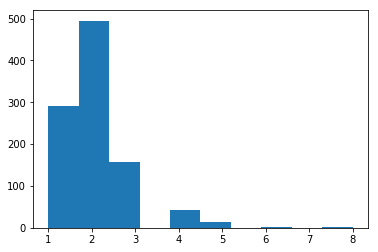

In [2]:
plt.hist(np.rint(np.random.lognormal(0.6, 0.4, 1000)))

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


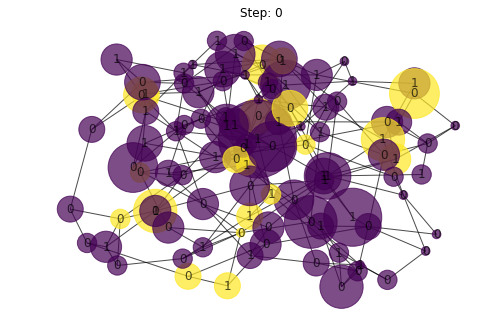

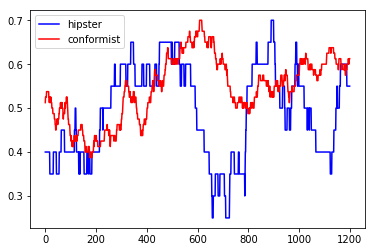

In [3]:
from operator import is_not
from functools import partial

class HipsterSimulation:
    def __init__(self, g=nx.watts_strogatz_graph(n = 100, k = 5, p = 0.5), 
                 p_hipster = 0.4, lag_params = (0.6, 0.4)):
        self.graph = g
        self.p_hipster = p_hipster
        self.node_history = [self.graph.nodes]
        self.meanhipster, self.meanconformist = [], []
        self.lag1, self.lag2 = lag_params

    def initialize(self):
        for node in self.graph.nodes:
            self.graph.nodes[node]['hipster'] = True if rd.random() < self.p_hipster else False
            self.graph.nodes[node]['opinion'] = rd.randint(0, 1)
            self.graph.nodes[node]['lag'] = np.rint(np.random.lognormal(self.lag1, self.lag2, 1))
        
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        size = [(self.graph.nodes[i]['lag'] + .25) * 300
                    for i in self.graph.nodes]
        labels = {i: round(self.graph.nodes[i]['opinion'], 2) 
                      for i in self.graph.nodes}
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            labels = labels, node_size = size,
            node_color=[self.graph.nodes[i]['hipster'] for i in self.graph.nodes],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        # select a node at random, find its neighbors and lag
        chosen_node = rd.sample(list(self.graph.nodes), 1)[0]
        neighbors = [key for key in self.graph.neighbors(chosen_node)]
        lag = int(self.graph.nodes[chosen_node]['lag'][0])
        
        # find its lagged neighbors and calculate trend
        personal = self.node_history[-lag] if len(self.node_history) >= lag else self.node_history[-1]
        trend = np.mean([personal[i]['opinion'] for i in neighbors])
        
        # update its stochastic based on trend and if it is a hipster
        if self.graph.nodes[chosen_node]['hipster']:
            self.graph.nodes[chosen_node]['opinion'] = np.random.binomial(1, 1 - trend) 
        else:
            self.graph.nodes[chosen_node]['opinion'] = np.random.binomial(1, trend) 
        self.node_history.append(self.graph.nodes)
        
        unpruned_hipsters = [self.graph.nodes[i]['opinion'] if self.graph.nodes[i]['hipster'] 
                             else None for i in self.graph.nodes]
        
        unpruned_conformists = [self.graph.nodes[i]['opinion'] if not self.graph.nodes[i]['hipster'] 
                             else None for i in self.graph.nodes]
        self.meanhipster.append(np.mean(list(filter(None.__ne__, unpruned_hipsters))))
        self.meanconformist.append(np.mean(list(filter(None.__ne__, unpruned_conformists))))
        
        
        self.step += 1
        
    def over_time(self):
        plt.figure()
        plt.plot(range(len(self.meanhipster)), self.meanhipster, 'b-', label = 'hipster')
        plt.plot(range(len(self.meanconformist)), self.meanconformist, 'r-', label = 'conformist') 
        plt.legend()
#         print(self.meanhipster)
        
test = HipsterSimulation(p_hipster = 0.2, lag_params = (0.6, 1))
test.initialize()
plt.figure()
test.observe()
for i in range(12):
    for i in range(100):
        test.update()
#     plt.figure()
#     test.observe()
test.over_time()

## Tests on various values of P

<Figure size 432x288 with 0 Axes>

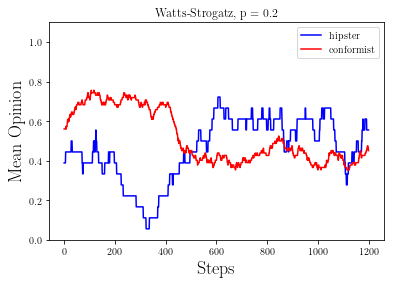

In [16]:
test = HipsterSimulation(p_hipster = 0.2, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()


plt.title('Watts-Strogatz, p = 0.2')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ws1.png", bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

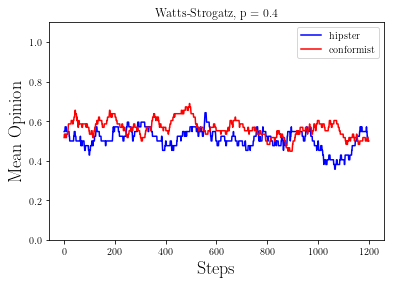

In [5]:
test = HipsterSimulation(p_hipster = 0.4, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Watts-Strogatz, p = 0.4')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ws2.png", bbox_inches='tight')




plt.show()

<Figure size 432x288 with 0 Axes>

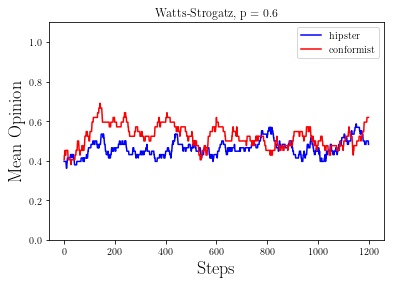

In [6]:
test = HipsterSimulation(p_hipster = 0.6, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Watts-Strogatz, p = 0.6')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ws3.png", bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

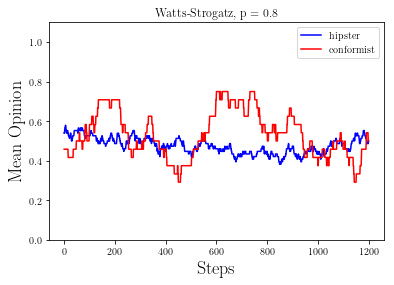

In [7]:
test = HipsterSimulation(p_hipster = 0.8, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Watts-Strogatz, p = 0.8')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ws4.png", bbox_inches='tight')

plt.show()

plt.show()

## Tests on Watts - Strogatz vs Barabasi - Albert

<Figure size 432x288 with 0 Axes>

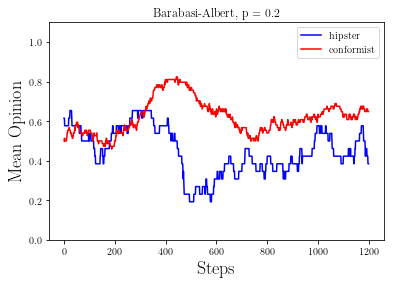

In [8]:
test = HipsterSimulation(g = nx.barabasi_albert_graph(100, 5),p_hipster = 0.2, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Barabasi-Albert, p = 0.2')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ba1.png", bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

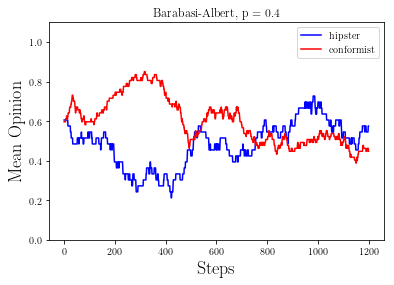

In [9]:
test = HipsterSimulation(g = nx.barabasi_albert_graph(100, 5),p_hipster = 0.4, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Barabasi-Albert, p = 0.4')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ba2.png", bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

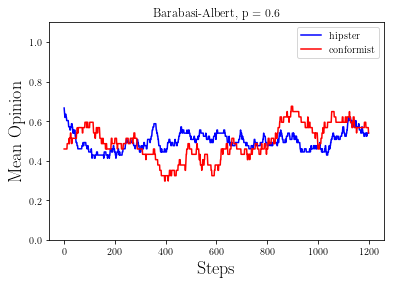

In [10]:
test = HipsterSimulation(g = nx.barabasi_albert_graph(100, 5),p_hipster = 0.6, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Barabasi-Albert, p = 0.6')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ba3.png", bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

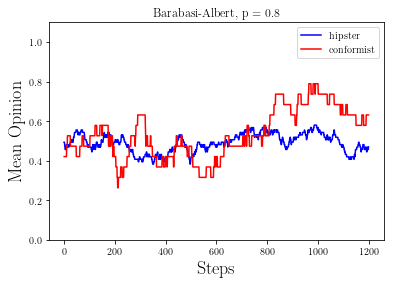

In [11]:
test = HipsterSimulation(g = nx.barabasi_albert_graph(100, 5),p_hipster = 0.8, lag_params = (0.6, 1))
test.initialize()
plt.figure()
for i in range(12):
    for i in range(100):
        test.update()
test.over_time()

plt.title('Barabasi-Albert, p = 0.8')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("ba4.png", bbox_inches='tight')

plt.show()

## Part 1: The Hipster - Mainstream Model
a hipster and a conformist with differing opinions

Two conformists with similar opinions

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


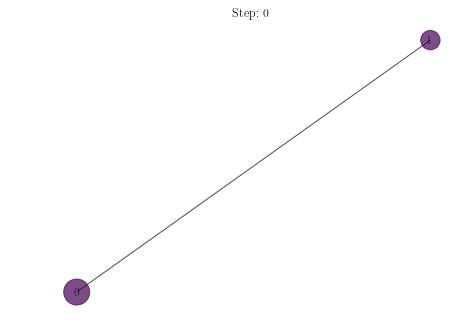

/Users/jacob/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jacob/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


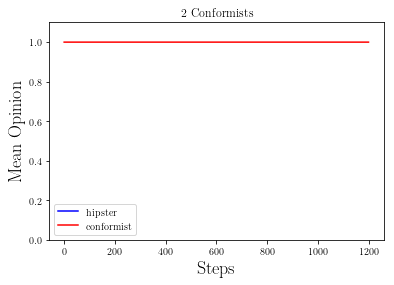

In [12]:
rd.seed(5)
g = nx.Graph()

g.add_nodes_from(['Hipster1', 'Hipster2'])
g.add_edges_from([('Hipster1', 'Hipster2')])

twonodes = HipsterSimulation(g = g)
twonodes.initialize()
plt.figure()
twonodes.observe()
plt.show()
for i in range(12):
    for i in range(100):
        twonodes.update()
twonodes.over_time()
plt.title('2 Conformists')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("2conformists.png", bbox_inches='tight')

plt.show()

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


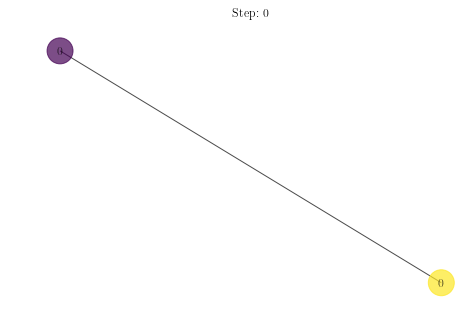

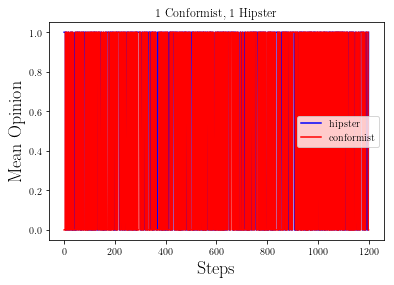

In [13]:
rd.seed(13)
g = nx.Graph()

g.add_nodes_from(['Hipster1', 'Hipster2'])
g.add_edges_from([('Hipster1', 'Hipster2')])

twonodes = HipsterSimulation(g = g)


twonodes.initialize()
plt.figure()
twonodes.observe()
for i in range(12):
    for i in range(100):
        twonodes.update()
twonodes.over_time()
plt.title('1 Conformist, 1 Hipster')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)

plt.savefig("1ofeach.png", bbox_inches='tight')

plt.show()

Two hipsters with differing opinions

/Users/jacob/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


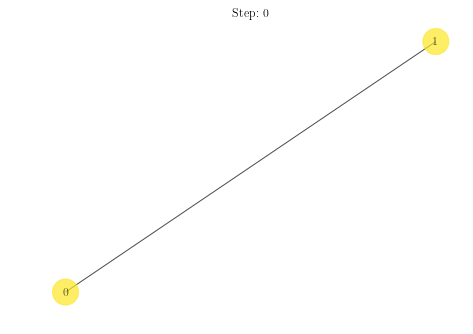

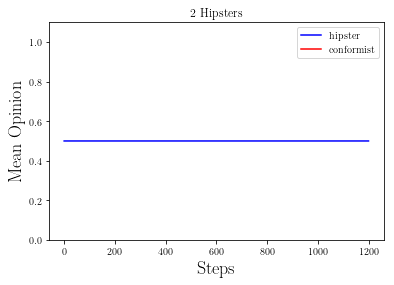

In [14]:
rd.seed(3)
g = nx.Graph()

g.add_nodes_from(['Hipster1', 'Hipster2'])
g.add_edges_from([('Hipster1', 'Hipster2')])

twonodes = HipsterSimulation(g = g)
twonodes.initialize()
plt.figure()
twonodes.observe()
plt.show()
for i in range(12):
    for i in range(100):
        twonodes.update()
twonodes.over_time()
plt.title('2 Hipsters')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylabel(r'Mean Opinion', fontsize=18)
plt.xlabel(r'Steps', fontsize=18)
plt.ylim(0,1.1)

plt.savefig("2hipsters.png", bbox_inches='tight')

plt.show()

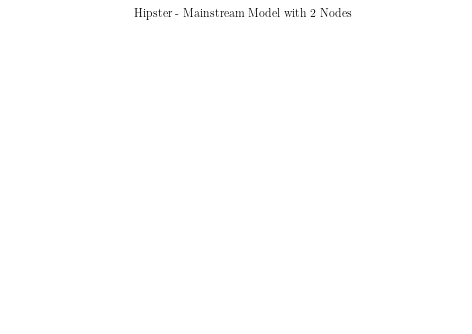

In [15]:
g = nx.watts_strogatz_graph(n = 2, k = 1, p = 1, seed=123)



nx.draw(g)
plt.title("Hipster - Mainstream Model with 2 Nodes")
plt.show()